<a href="https://colab.research.google.com/github/Peerada-Sukharom/data-analysis-portfolio/blob/main/_onet_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Relationship Between O-NET Performance and Student Migration to Roi-et Province
The goal of this project is to investigate whether provincial O-NET scores influence students’ decisions to pursue education in Roi-et and identify academic performance patterns and regional disparities among provinces in Northeastern Thailand.

*Note: All datasets and figures in this notebook remain in the original Buddhist calendar format (B.E.) without conversion to C.E.*

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df_onet_m6 = pd.read_csv("/content/drive/My Drive/csv_portfolio/03-onet-m6-stats-by-province.csv", encoding='utf-8')
df_onet_m6.head()

Mounted at /content/drive


,YEAR_COURSE,PROV_NAME,SBJ_NAME,STUDENT_CNT,AVG_SCORE,SD_SCORE,MED_SCORE,MOD_SCORE,MIN_SCORE,MAX_SCORE
0,2561,กรุงเทพมหานคร,ภาษาไทย,"45,083",54.42,16.96,56.0,56.50,0.00,95.5
1,2561,กรุงเทพมหานคร,สังคมศึกษา ศาสนา และวัฒนธรรม,"45,311",38.45,9.24,38.0,37.00,1.00,79.0
2,2561,กรุงเทพมหานคร,ภาษาอังกฤษ,"45,278",43.27,20.49,37.5,23.75,6.25,100.0
3,2561,กรุงเทพมหานคร,คณิตศาสตร์,"45,321",41.64,26.21,32.5,22.50,0.00,100.0
4,2561,กรุงเทพมหานคร,วิทยาศาสตร์,"45,112",34.80,14.14,31.6,29.20,3.20,98.4


**Data Preprocessing**
1. Exploring Data - Inspect the dataset structure

2. Cleaning Data - Replacing duplicated values

3. Filtering data - include only Northeastern (Isan) provinces for regional analysis

In [3]:
df_onet_m6.nunique()

,0
YEAR_COURSE,7
PROV_NAME,77
SBJ_NAME,6
STUDENT_CNT,1957
AVG_SCORE,1727
SD_SCORE,1065
MED_SCORE,331
MOD_SCORE,233
MIN_SCORE,147
MAX_SCORE,380


In [4]:
df_onet_m6.replace('สังคมศึกษา ศาสนา และ วัฒนธรรม','สังคมศึกษา ศาสนา และวัฒนธรรม', inplace = True)
df_onet_m6.replace('สังคมศึกษา ศาสนาและวัฒนธรรม','สังคมศึกษา ศาสนา และวัฒนธรรม', inplace = True)

In [5]:
df_onet_m6[df_onet_m6['SBJ_NAME'].str.contains('สังคม')]

,YEAR_COURSE,PROV_NAME,SBJ_NAME,STUDENT_CNT,AVG_SCORE,SD_SCORE,MED_SCORE,MOD_SCORE,MIN_SCORE,MAX_SCORE
1,2561,กรุงเทพมหานคร,สังคมศึกษา ศาสนา และวัฒนธรรม,"45,311",38.45,9.24,38.00,37.00,1.00,79.00
6,2561,สมุทรปราการ,สังคมศึกษา ศาสนา และวัฒนธรรม,"7,638",36.00,7.68,36.00,35.00,6.00,70.00
11,2561,นนทบุรี,สังคมศึกษา ศาสนา และวัฒนธรรม,"6,925",36.92,7.94,37.00,39.00,4.00,72.00
16,2561,ปทุมธานี,สังคมศึกษา ศาสนา และวัฒนธรรม,"6,713",35.50,7.71,35.00,32.00,3.00,70.00
21,2561,พระนครศรีอยุธยา,สังคมศึกษา ศาสนา และวัฒนธรรม,"3,666",34.50,7.36,34.00,34.00,9.00,71.00
...,...,...,...,...,...,...,...,...,...,...
2671,2567,ตรัง,สังคมศึกษา ศาสนา และวัฒนธรรม,"3,267",38.70,10.81,38.25,40.25,9.50,87.75
2676,2567,พัทลุง,สังคมศึกษา ศาสนา และวัฒนธรรม,"2,170",36.03,9.64,35.75,34.00,7.50,80.00
2681,2567,ปัตตานี,สังคมศึกษา ศาสนา และวัฒนธรรม,"4,247",29.01,8.89,28.00,26.50,6.25,89.25
2686,2567,ยะลา,สังคมศึกษา ศาสนา และวัฒนธรรม,"2,816",32.32,11.52,30.75,29.50,9.25,92.50


In [6]:
isan_provinces = [
    'นครราชสีมา', 'ขอนแก่น', 'อุดรธานี', 'เลย', 'ร้อยเอ็ด',
    'สกลนคร', 'มหาสารคาม', 'กาฬสินธุ์', 'ชัยภูมิ', 'หนองคาย',
    'หนองบัวลำภู', 'บึงกาฬ', 'ยโสธร', 'สุรินทร์', 'ศรีสะเกษ',
    'อำนาจเจริญ', 'บุรีรัมย์', 'มุกดาหาร'
]


df_onet_m6_isan = df_onet_m6[df_onet_m6['PROV_NAME'].isin(isan_provinces)]

df_onet_m6_isan.tail()

,YEAR_COURSE,PROV_NAME,SBJ_NAME,STUDENT_CNT,AVG_SCORE,SD_SCORE,MED_SCORE,MOD_SCORE,MIN_SCORE,MAX_SCORE
2495,2567,มุกดาหาร,ภาษาไทย,"1,419",42.14,14.31,41.60,34.30,8.00,80.80
2496,2567,มุกดาหาร,สังคมศึกษา ศาสนา และวัฒนธรรม,"1,410",36.13,11.39,34.63,34.00,10.75,86.00
2497,2567,มุกดาหาร,ภาษาอังกฤษ,"1,419",32.47,20.81,24.80,18.24,4.92,98.36
2498,2567,มุกดาหาร,คณิตศาสตร์,"1,395",25.47,18.06,18.75,18.75,0.00,100.00
2499,2567,มุกดาหาร,วิทยาศาสตร์,"1,414",30.16,10.76,29.20,29.40,4.80,77.60


In [7]:
df_onet_m6_isan.isnull().sum()

,0
YEAR_COURSE,0
PROV_NAME,0
SBJ_NAME,0
STUDENT_CNT,0
AVG_SCORE,0
SD_SCORE,0
MED_SCORE,0
MOD_SCORE,0
MIN_SCORE,0
MAX_SCORE,0


**Exploratory Data Analysis - 1**

I filtered O-NET results of Roi-et province for four major subjects (Thai, Mathematics, Science, and English) across academic years 2018–2024, focused on evaluating yearly trends in maximum, minimum, and average scores.

*However*, the results showed fluctuations, suggesting that the policy change when O-NET scores were no longer used for university admissions *may have reduced students’ motivation* to perform well in the test.

In [8]:
df_roiet_m6 = df_onet_m6_isan[df_onet_m6_isan['PROV_NAME'] == 'ร้อยเอ็ด']
df_roiet_m6.head()

,YEAR_COURSE,PROV_NAME,SBJ_NAME,STUDENT_CNT,AVG_SCORE,SD_SCORE,MED_SCORE,MOD_SCORE,MIN_SCORE,MAX_SCORE
165,2561,ร้อยเอ็ด,ภาษาไทย,"7,041",43.63,15.31,43.00,39.00,7.0,92.0
166,2561,ร้อยเอ็ด,สังคมศึกษา ศาสนา และวัฒนธรรม,"7,041",33.76,7.31,33.00,32.00,12.0,69.0
167,2561,ร้อยเอ็ด,ภาษาอังกฤษ,"7,049",27.07,11.70,23.75,21.25,7.5,90.0
168,2561,ร้อยเอ็ด,คณิตศาสตร์,"7,050",26.53,17.00,22.50,17.50,0.0,100.0
169,2561,ร้อยเอ็ด,วิทยาศาสตร์,"7,045",28.41,9.45,27.20,29.20,5.6,86.4


In [9]:
math_roiet_m6 = ['คณิตศาสตร์']
df_math_roiet_m6 = df_roiet_m6[df_roiet_m6['SBJ_NAME'].isin(math_roiet_m6)]
df_math_roiet_m6.head(8)

,YEAR_COURSE,PROV_NAME,SBJ_NAME,STUDENT_CNT,AVG_SCORE,SD_SCORE,MED_SCORE,MOD_SCORE,MIN_SCORE,MAX_SCORE
168,2561,ร้อยเอ็ด,คณิตศาสตร์,"7,050",26.53,17.00,22.50,17.50,0.0,100.00
553,2562,ร้อยเอ็ด,คณิตศาสตร์,"6,629",21.81,14.74,17.50,15.00,0.0,100.00
938,2563,ร้อยเอ็ด,คณิตศาสตร์,"6,520",23.10,13.56,18.75,15.63,0.0,96.88
1323,2564,ร้อยเอ็ด,คณิตศาสตร์,"3,189",19.62,11.64,18.75,15.00,0.0,92.50
1708,2565,ร้อยเอ็ด,คณิตศาสตร์,"1,223",21.43,12.15,18.75,15.00,0.0,88.75
2093,2566,ร้อยเอ็ด,คณิตศาสตร์,"1,036",19.49,12.61,16.25,15.00,0.0,100.00
2478,2567,ร้อยเอ็ด,คณิตศาสตร์,"4,131",20.74,12.38,18.75,15.00,0.0,100.00


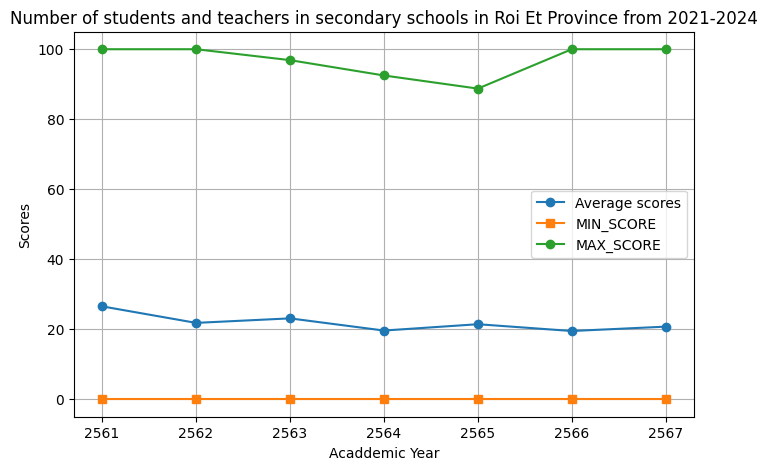

In [10]:
plt.figure(figsize=(8,5))
plt.plot(df_math_roiet_m6['YEAR_COURSE'], df_math_roiet_m6['AVG_SCORE'], marker='o', label='Average scores')
plt.plot(df_math_roiet_m6['YEAR_COURSE'], df_math_roiet_m6['MIN_SCORE'], marker='s', label='MIN_SCORE')
plt.plot(df_math_roiet_m6['YEAR_COURSE'], df_math_roiet_m6['MAX_SCORE'], marker='o', label='MAX_SCORE')

plt.title('Number of students and teachers in secondary schools in Roi Et Province from 2021-2024')
plt.xlabel('Acaddemic Year')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
sci_roiet_m6 = ['วิทยาศาสตร์']
df_sci_roiet_m6 = df_roiet_m6[df_roiet_m6['SBJ_NAME'].isin(sci_roiet_m6)]
df_sci_roiet_m6.head(8)

,YEAR_COURSE,PROV_NAME,SBJ_NAME,STUDENT_CNT,AVG_SCORE,SD_SCORE,MED_SCORE,MOD_SCORE,MIN_SCORE,MAX_SCORE
169,2561,ร้อยเอ็ด,วิทยาศาสตร์,"7,045",28.41,9.45,27.20,29.2,5.6,86.4
554,2562,ร้อยเอ็ด,วิทยาศาสตร์,"6,628",27.29,9.91,26.00,27.5,6.0,94.0
939,2563,ร้อยเอ็ด,วิทยาศาสตร์,"6,483",30.39,11.32,28.45,23.9,4.4,97.8
1324,2564,ร้อยเอ็ด,วิทยาศาสตร์,"2,851",27.63,8.32,27.00,27.0,4.8,70.4
1709,2565,ร้อยเอ็ด,วิทยาศาสตร์,"1,071",27.58,8.88,26.80,22.0,7.2,75.4
2094,2566,ร้อยเอ็ด,วิทยาศาสตร์,982,29.42,9.86,29.00,27.0,7.2,80.8
2479,2567,ร้อยเอ็ด,วิทยาศาสตร์,"4,196",27.90,9.49,27.00,24.4,2.4,80.4


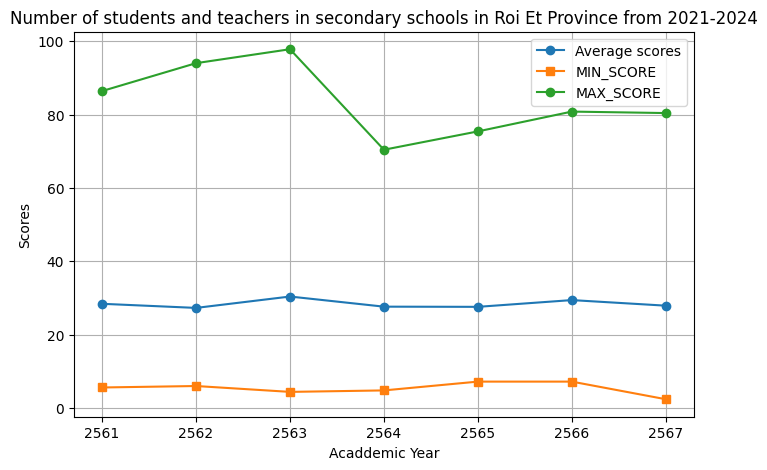

In [12]:
plt.figure(figsize=(8,5))
plt.plot(df_sci_roiet_m6['YEAR_COURSE'], df_sci_roiet_m6['AVG_SCORE'], marker='o', label='Average scores')
plt.plot(df_sci_roiet_m6['YEAR_COURSE'], df_sci_roiet_m6['MIN_SCORE'], marker='s', label='MIN_SCORE')
plt.plot(df_sci_roiet_m6['YEAR_COURSE'], df_sci_roiet_m6['MAX_SCORE'], marker='o', label='MAX_SCORE')

plt.title('Number of students and teachers in secondary schools in Roi Et Province from 2021-2024')
plt.xlabel('Acaddemic Year')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
soc_roiet_m6 = ['สังคมศึกษา ศาสนา และวัฒนธรรม']
df_soc_roiet_m6 = df_roiet_m6[df_roiet_m6['SBJ_NAME'].isin(soc_roiet_m6)]
df_soc_roiet_m6['YEAR_COURSE'] = df_soc_roiet_m6['YEAR_COURSE'].astype(int)

df_soc_roiet_m6.head(8)

/tmp/ipython-input-3993906077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soc_roiet_m6['YEAR_COURSE'] = df_soc_roiet_m6['YEAR_COURSE'].astype(int)


,YEAR_COURSE,PROV_NAME,SBJ_NAME,STUDENT_CNT,AVG_SCORE,SD_SCORE,MED_SCORE,MOD_SCORE,MIN_SCORE,MAX_SCORE
166,2561,ร้อยเอ็ด,สังคมศึกษา ศาสนา และวัฒนธรรม,"7,041",33.76,7.31,33.00,32.00,12.00,69.00
551,2562,ร้อยเอ็ด,สังคมศึกษา ศาสนา และวัฒนธรรม,"6,620",33.75,8.19,33.00,31.00,6.00,69.00
936,2563,ร้อยเอ็ด,สังคมศึกษา ศาสนา และวัฒนธรรม,"6,516",34.80,7.60,34.00,34.00,8.00,70.00
1321,2564,ร้อยเอ็ด,สังคมศึกษา ศาสนา และวัฒนธรรม,"3,266",35.91,8.34,35.75,37.50,6.50,69.75
1706,2565,ร้อยเอ็ด,สังคมศึกษา ศาสนา และวัฒนธรรม,"1,256",33.49,8.03,32.75,32.75,12.25,65.00
2091,2566,ร้อยเอ็ด,สังคมศึกษา ศาสนา และวัฒนธรรม,960,33.84,8.43,34.00,29.50,9.25,64.75
2476,2567,ร้อยเอ็ด,สังคมศึกษา ศาสนา และวัฒนธรรม,"4,182",34.16,10.04,34.00,35.75,9.00,91.00


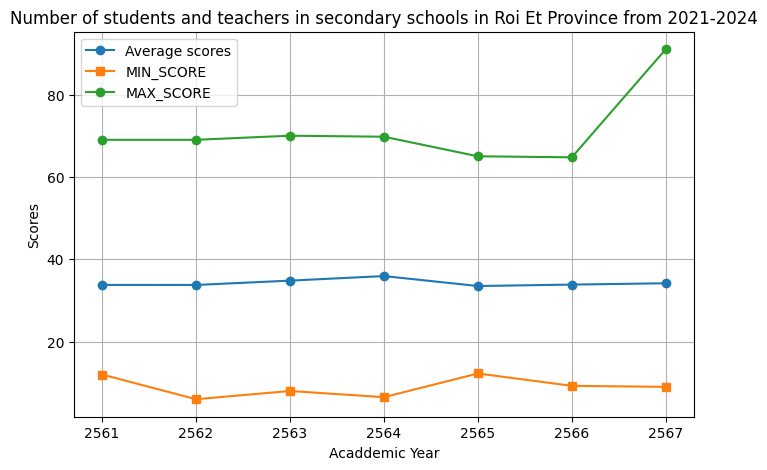

In [14]:
plt.figure(figsize=(8,5))
plt.plot(df_soc_roiet_m6['YEAR_COURSE'], df_soc_roiet_m6['AVG_SCORE'], marker='o', label='Average scores')
plt.plot(df_soc_roiet_m6['YEAR_COURSE'], df_soc_roiet_m6['MIN_SCORE'], marker='s', label='MIN_SCORE')
plt.plot(df_soc_roiet_m6['YEAR_COURSE'], df_soc_roiet_m6['MAX_SCORE'], marker='o', label='MAX_SCORE')

plt.title('Number of students and teachers in secondary schools in Roi Et Province from 2021-2024')
plt.xlabel('Acaddemic Year')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
eng_roiet_m6 = ['ภาษาอังกฤษ']
df_eng_roiet_m6 = df_roiet_m6[df_roiet_m6['SBJ_NAME'].isin(eng_roiet_m6)]

df_eng_roiet_m6.head(8)


,YEAR_COURSE,PROV_NAME,SBJ_NAME,STUDENT_CNT,AVG_SCORE,SD_SCORE,MED_SCORE,MOD_SCORE,MIN_SCORE,MAX_SCORE
167,2561,ร้อยเอ็ด,ภาษาอังกฤษ,"7,049",27.07,11.70,23.75,21.25,7.50,90.00
552,2562,ร้อยเอ็ด,ภาษาอังกฤษ,"6,629",25.42,10.30,22.50,21.25,5.00,88.75
937,2563,ร้อยเอ็ด,ภาษาอังกฤษ,"6,508",25.84,10.74,23.75,22.50,6.25,91.25
1322,2564,ร้อยเอ็ด,ภาษาอังกฤษ,"3,110",23.50,11.00,20.28,18.34,3.28,89.76
1707,2565,ร้อยเอ็ด,ภาษาอังกฤษ,"1,162",21.77,8.27,20.08,18.24,3.38,76.64
2092,2566,ร้อยเอ็ด,ภาษาอังกฤษ,967,25.64,11.97,23.26,16.60,6.56,95.08
2477,2567,ร้อยเอ็ด,ภาษาอังกฤษ,"4,189",28.03,15.46,23.36,18.34,4.92,100.00


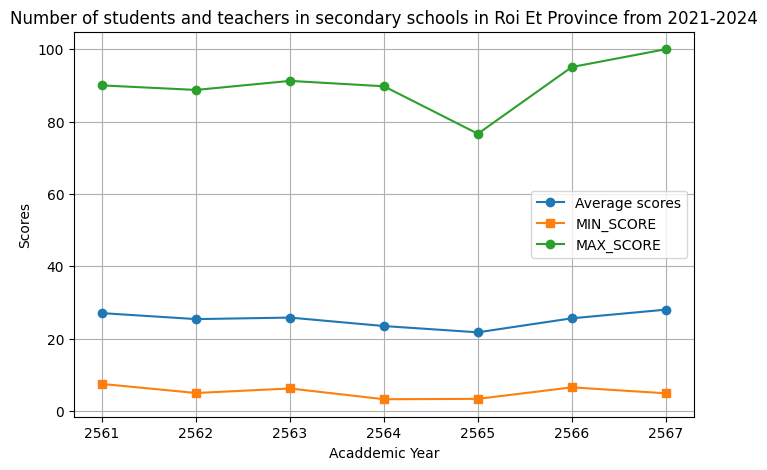

In [16]:
plt.figure(figsize=(8,5))
plt.plot(df_eng_roiet_m6['YEAR_COURSE'], df_eng_roiet_m6['AVG_SCORE'], marker='o', label='Average scores')
plt.plot(df_eng_roiet_m6['YEAR_COURSE'], df_eng_roiet_m6['MIN_SCORE'], marker='s', label='MIN_SCORE')
plt.plot(df_eng_roiet_m6['YEAR_COURSE'], df_eng_roiet_m6['MAX_SCORE'], marker='o', label='MAX_SCORE')

plt.title('Number of students and teachers in secondary schools in Roi Et Province from 2021-2024')
plt.xlabel('Acaddemic Year')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

**Exploratory Data Analysis - 2**

In this section, I filtered the provinces in the Northeastern region, grouped into four categories to analyze regional differences in O-NET performance

1. Provinces with major universities — Khon Kaen, Ubon Ratchathani, Nakhon Ratchasima, and Maha Sarakham

2. Provinces bordering Roi-et — neighboring provinces in the central part of Isan

3. Roi-et Province — point of this study

4. Other provinces — remaining the rest of country

The purpose of this grouping is to examine whether Roi-et’s O-NET scores are significantly different or outstanding compared to its neighboring areas and major academic centers in the region.

The result

In [17]:
subjects = ['ภาษาไทย', 'คณิตศาสตร์', 'วิทยาศาสตร์', 'สังคมศึกษา ศาสนา และวัฒนธรรม', 'อังกฤษ']

In [29]:
roi_et = ['ร้อยเอ็ด']
isan_central_border = ['มุกดาหาร', 'มหาสารคาม', 'กาฬสินธุ์', 'ยโสธร']
isan_with_uni = ['ขอนแก่น', 'อุบลราชธานี', 'นครราชสีมา', 'มหาสารคาม']

def region_group(province):
    if province in roi_et:
        return 'Roi-et'
    elif province in isan_central_border:
        return 'Northeastern Central (Bordering Provinces)'
    elif province in isan_with_uni:
        return 'Northeastern (Provinces with Main Universities)'
    else:
        return 'Other'

df_onet_m6['Region'] = df_onet_m6['PROV_NAME'].apply(region_group)

subject_mapping = {
    'ภาษาไทย': 'Thai',
    'คณิตศาสตร์': 'Mathematics',
    'วิทยาศาสตร์': 'Science',
    'สังคมศึกษา ศาสนา และวัฒนธรรม': 'Social Studies',
    'ภาษาอังกฤษ': 'English'
}

subjects = list(subject_mapping.keys())
df_onet = df_onet_m6[df_onet_m6['SBJ_NAME'].isin(subjects)]
df_onet['Subject_ENG'] = df_onet['SBJ_NAME'].map(subject_mapping)


In [30]:
df_avg = df_onet.groupby(['YEAR_COURSE', 'Region', 'Subject_ENG'])['AVG_SCORE'].mean().reset_index()
df_avg

,YEAR_COURSE,Region,Subject_ENG,AVG_SCORE
0,2561,Northeastern (Provinces with Main Universities),English,28.316667
1,2561,Northeastern (Provinces with Main Universities),Mathematics,27.043333
2,2561,Northeastern (Provinces with Main Universities),Science,29.216667
3,2561,Northeastern (Provinces with Main Universities),Social Studies,34.133333
4,2561,Northeastern (Provinces with Main Universities),Thai,44.710000
...,...,...,...,...
135,2567,Roi-et,English,28.030000
136,2567,Roi-et,Mathematics,20.740000
137,2567,Roi-et,Science,27.900000
138,2567,Roi-et,Social Studies,34.160000


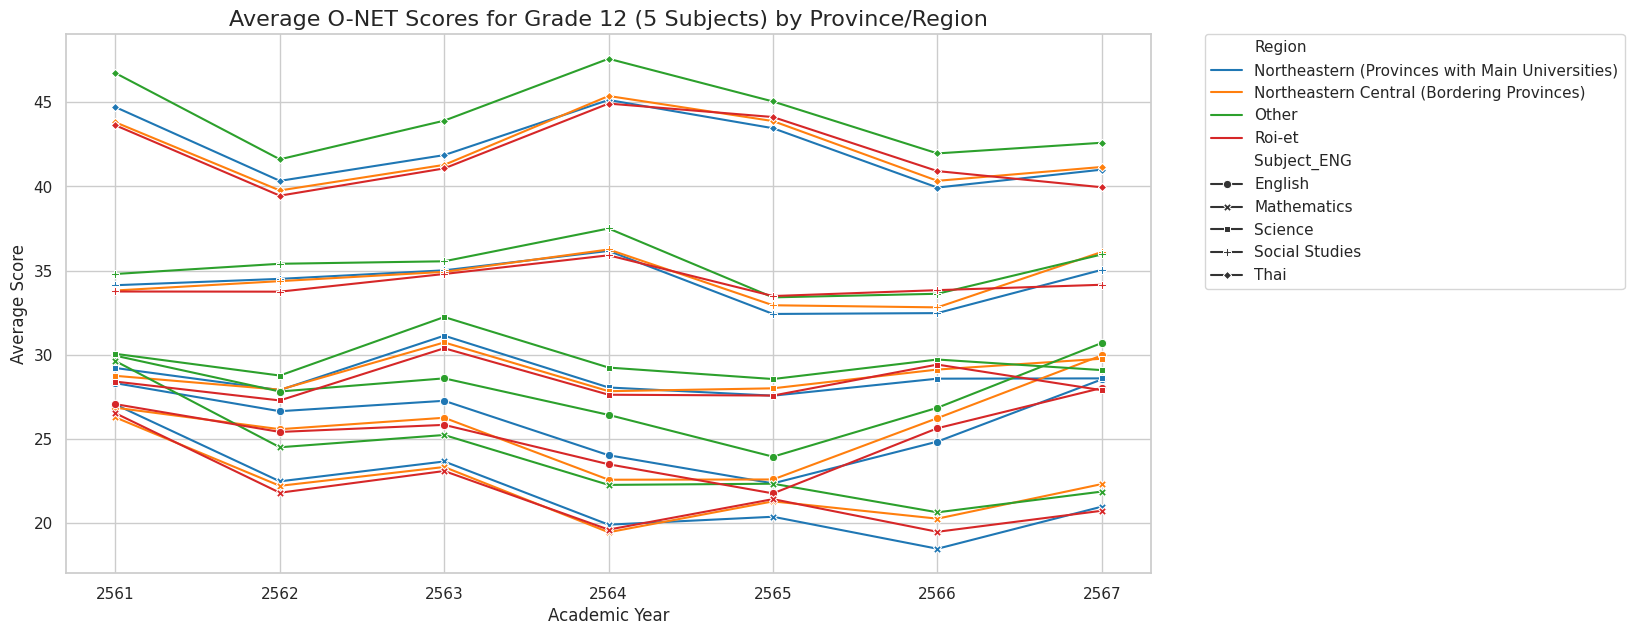

In [31]:
sns.set(style="whitegrid", palette="tab10")

plt.figure(figsize=(14,7))
sns.lineplot(
    data = df_avg,
    x='YEAR_COURSE',
    y='AVG_SCORE',
    hue='Region',
    style='Subject_ENG',
    markers=True,
    dashes=False
)

plt.title('Average O-NET Scores for Grade 12 (5 Subjects) by Province/Region', fontsize=16)
plt.ylabel('Average Score', fontsize=12)
plt.xlabel('Academic Year', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

**Variance Comparison Across Regional Groups**



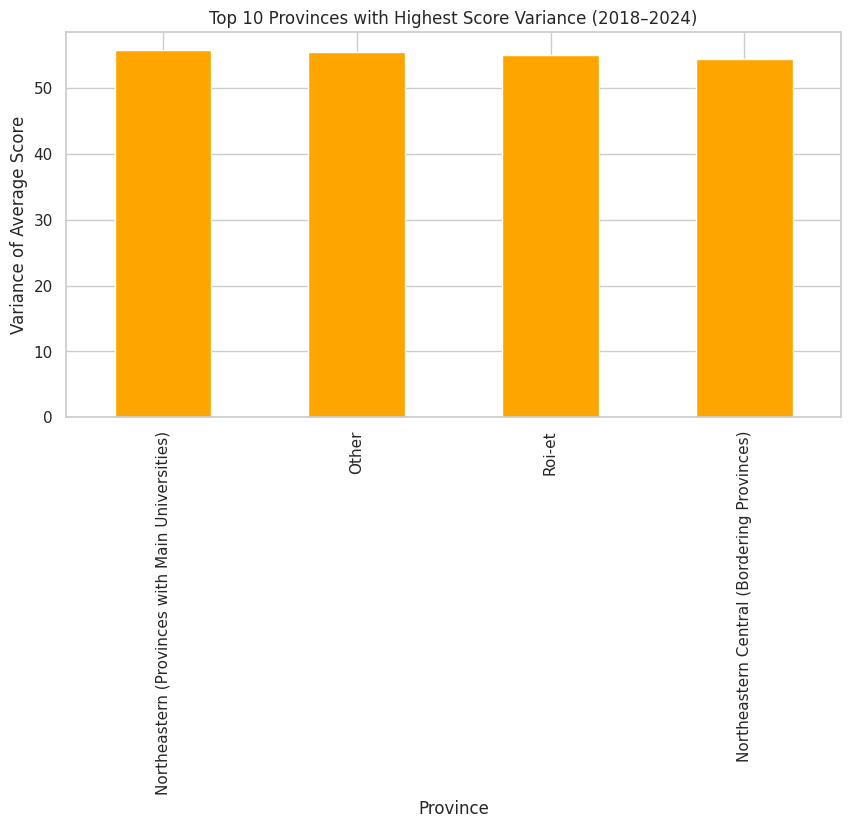

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

province_var = df_avg.groupby('Region')['AVG_SCORE'].var().sort_values(ascending=False)

plt.figure(figsize=(10,5))
province_var.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Provinces with Highest Score Variance (2018–2024)')
plt.xlabel('Province')
plt.ylabel('Variance of Average Score')
plt.show()


**K-Means Clustering of Provinces**

Subject_ENG                                      Cluster
Region                                                  
Northeastern (Provinces with Main Universities)        2
Northeastern Central (Bordering Provinces)             0
Other                                                  1
Roi-et                                                 2


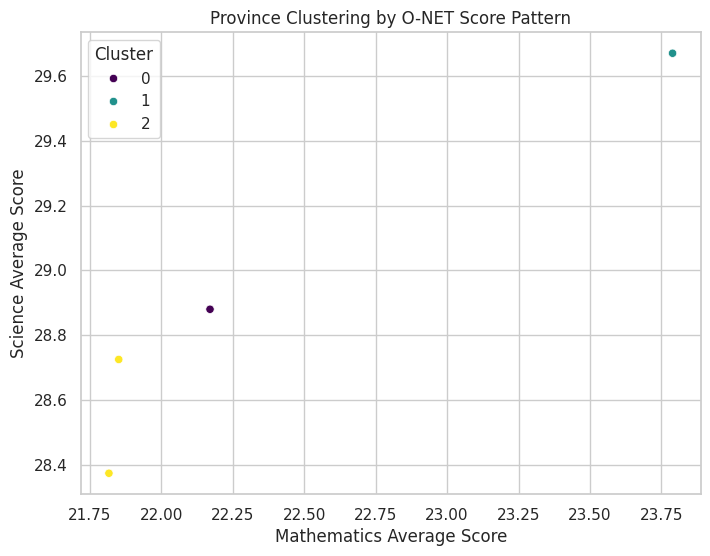

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

pivot = df_avg.pivot_table(
    index='Region',
    columns='Subject_ENG',
    values='AVG_SCORE',
    aggfunc='mean'
).fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot)

kmeans = KMeans(n_clusters=3, random_state=42)
pivot['Cluster'] = kmeans.fit_predict(X_scaled)

print(pivot[['Cluster']].head())

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pivot['Mathematics'],
    y=pivot['Science'],
    hue=pivot['Cluster'],
    palette='viridis'
)
plt.title('Province Clustering by O-NET Score Pattern')
plt.xlabel('Mathematics Average Score')
plt.ylabel('Science Average Score')
plt.show()


**Correlation Heatmap Between O-NET Subjects**

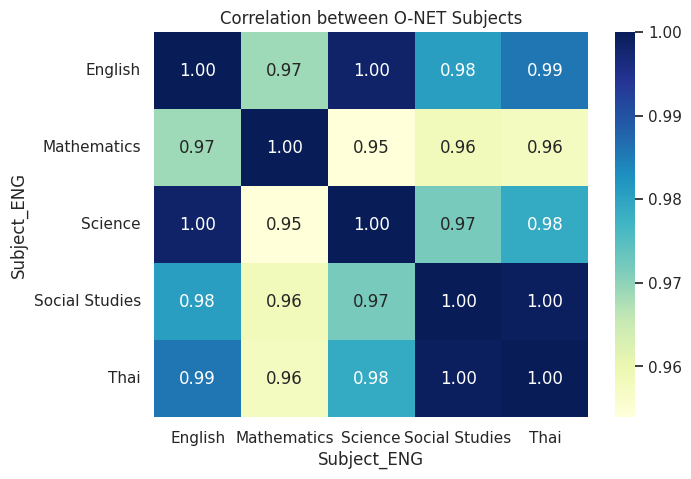

In [23]:
corr = pivot.drop(columns=['Cluster'], errors='ignore').corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation between O-NET Subjects')
plt.show()


# Result

The analysis revealed **that Roi-et’s O-NET performance does not significantly stand out** compared to other Northeastern provinces, especially with established universities such as Khon Kaen, Ubon Ratchathani, Nakhon Ratchasima and Maha Sarakham.

However,O-NET results alone do not appear to be a major factor influencing student migration or educational preference, highlighting the need to consider other social and institutional factors in future studies.